In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import pandas_datareader as pdr
import numpy as np

In [13]:
def testRun():
    df = pd.read_csv("HCP.csv")
    print(df[10:21])
    
testRun()

df = pd.read_csv("HCP.csv")
df['Close'].max()

print("{}.csv".format("IBM"))
print("{}.csv".format("AAPL"))

FileNotFoundError: File b'HCP.csv' does not exist

In [ ]:
def get_max(symbol):
    df = pd.read_csv("{}.csv".format(symbol))
    return df["Close"].max()

def test_run():
    for symbol in ["AAPL","IBM"]:
        print("Max close")
        print(symbol, "$", get_max(symbol))

test_run()

In [ ]:
def test_run2():
    df = pd.read_csv("AAPL.csv")
    df["Close"].plot()
    plt.show()

test_run2()

In [65]:
def load_data(symbols, start='2017-01-01', end='2017-12-31'):
    dates = pd.date_range(start, end) #start/end dates
    df1 = pd.DataFrame(index=dates) #empty dataframe
    
    for symbol in symbols:
        #Read data into temp dataframe
        if (not os.path.isfile("{}.csv".format(symbol))):
            df_temp = pdr.get_data_yahoo(symbol, start, end)
            df_temp.to_csv("{}.csv".format(symbol))
            
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col="Date", parse_dates=True, usecols=['Date', 'Adj Close'])

        #rename Adj Close to name of the symbol to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close':symbol})

        #join the two dataframes using dataframe.join(), with how='inner'
        df1 = df1.join(df_temp, how='inner')

    return df1

print(load_data(['GOOG']))

                  GOOG
2017-01-03  786.140015
2017-01-04  786.900024
2017-01-05  794.020020
2017-01-06  806.150024
2017-01-09  806.650024
2017-01-10  804.789978
2017-01-11  807.909973
2017-01-12  806.359985
2017-01-13  807.880005
2017-01-17  804.609985
2017-01-18  806.070007
2017-01-19  802.174988
2017-01-20  805.020020
2017-01-23  819.309998
2017-01-24  823.869995
2017-01-25  835.669983
2017-01-26  832.150024
2017-01-27  823.309998
2017-01-30  802.320007
2017-01-31  796.789978
2017-02-01  795.695007


In [104]:
def slice_df():
    #start/end dates
    start = '2017-01-01'
    end = '2017-01-31'
    
    symbols = ['GOOG', 'AMZN', 'ARKW', 'AAPL']
    
    #get stock data
    df = load_data(symbols, start, end)
    
    #slice by row range (dates) and columns (symbols)
    df = df.loc[start:end, symbols]
    
    return df

print(slice_df())

                  GOOG        AMZN       ARKW        AAPL
2017-01-03  786.140015  753.669983  25.424000  114.311760
2017-01-04  786.900024  757.179993  26.170000  114.183815
2017-01-05  794.020020  780.450012  26.350000  114.764473
2017-01-06  806.150024  795.989990  26.566000  116.043915
2017-01-09  806.650024  796.919983  26.719999  117.106812
2017-01-10  804.789978  795.900024  26.950001  117.224907
2017-01-11  807.909973  799.020020  26.992001  117.854782
2017-01-12  806.359985  813.640015  26.930000  117.362694
2017-01-13  807.880005  817.140015  27.084000  117.156021
2017-01-17  804.609985  809.719971  26.840000  118.100822
2017-01-18  806.070007  807.479980  26.851000  118.090981
2017-01-19  802.174988  809.039978  27.010000  117.884300
2017-01-20  805.020020  808.330017  27.000000  118.100822
2017-01-23  819.309998  817.880005  27.010000  118.179558
2017-01-24  823.869995  822.440002  27.399000  118.071304
2017-01-25  835.669983  836.520020  27.671000  119.951073
2017-01-26  83

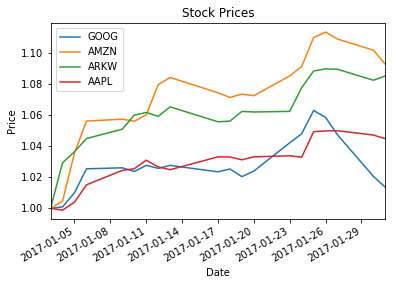

In [105]:
def normalize_data(df):
    return df / df.iloc[0]

def plot_data(df, title="Stock Prices"):
    df = normalize_data(df)
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    
    plt.show()

plot_data(slice_df())

In [148]:
def numpy_test():
    #creates an np array
    print(np.array([(2, 3, 4), (5, 6, 7)]))
    
    #creates an empty 2d array
    print(np.empty((2, 3)))
    
    #creates an array full of random numbers (betweeen 0.0 and 1.0)
    print(np.random.random((5, 4))) #pass in size as tuple
    
    #sample numbers from a normal (Gaussian) distribution
    print(np.random.normal(size=(2, 3)))
    
    #generates random integers in an array
    print(np.random.randint(0, 10, size=5)) #1D array
    print(np.random.randint(0, 10, size=(2, 3))) #2D array

numpy_test()

[[2 3 4]
 [5 6 7]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]
[[ 0.26691349  0.57633733  0.37107448  0.76290268]
 [ 0.95263642  0.24788414  0.53860981  0.51132652]
 [ 0.86445481  0.51706511  0.59323235  0.54926794]
 [ 0.69162983  0.28772073  0.05770129  0.9732739 ]
 [ 0.94420406  0.26503633  0.58694747  0.45560382]]
[[-0.52541614  0.26387634  0.85583611]
 [-0.97660068 -0.18111318 -0.69894082]]
[3 1 8 3 0]
[[5 1 1]
 [2 9 7]]


In [159]:
#Array Attributes
def numpy_test2():
    a = np.random.random((5, 4)) #5 rows x 4 cols
    print(a)
    print("Dimensions:", a.shape)
    print("Rows:", a.shape[0])
    print("Columns:", a.shape[1])
    print("Elements:", a.size)

numpy_test2()

[[ 0.03370129  0.80997904  0.72121673  0.61338889]
 [ 0.32582103  0.55386305  0.96882923  0.25013438]
 [ 0.7417487   0.1614592   0.73328581  0.02107193]
 [ 0.00783249  0.51301487  0.38788097  0.78984191]
 [ 0.15939008  0.65929391  0.09894243  0.73704084]]
Dimensions: (5, 4)
Rows: 5
Columns: 4
Elements: 20


In [174]:
#Operations on Arrays
def test_run3():
    np.random.seed(693) #Used to get same sequence of numbers every time
    a = np.random.randint(0, 10, size=(5, 4)) #numbers between 0-10
    
    print(a)
    print("Sum of elements:", a.sum())
    print("Sum of columns:", a.sum(axis=0))
    print("Sum of rows:", a.sum(axis=1))
    print("Minimum of columns:", a.min(axis=0))
    print("Maximum of rows:", a.max(axis=1))
    print("Mean of array:", a.mean())

test_run3()

[[2 0 5 1]
 [1 3 4 4]
 [9 2 9 1]
 [9 3 7 5]
 [4 7 0 3]]
Sum of elements: 79
Sum of columns: [25 15 25 14]
Sum of rows: [ 8 12 21 24 14]
Minimum of columns: [1 0 0 1]
Maximum of rows: [5 4 9 9 7]
Mean of array: 3.95
